<a href="https://colab.research.google.com/github/suvhradipghosh07/Brain-Tumour-Analysis-using-Transfer-Learning/blob/master/BrainTumor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Brain Tumour Detection using Various Deep Learning Architecture

## INTRODUCTION
The dataset contains 2 folders: yes and no which contains 253 Brain MRI Images. The folder yes contains 155 Brain MRI Images that are tumorous and the folder no contains 98 Brain MRI Images that are non-tumorous.

## UTILITY
The dataset can be used for Brain Tumor Detection and Analysis using Computer Vision.

## CREDITS
https://www.kaggle.com/sruti97

## Dataset
*Training Samples*
**233** Images
<br>
*Test Samples*
**10** Images

In [0]:
import io
import zipfile

dataset = "/content/Brain Tumor Dataset.zip"
zip_ref = zipfile.ZipFile(dataset, "r")
zip_ref.extractall()
zip_ref.close()

In [0]:
import os
train_dir = "/content/Brain Tumor Dataset/Train"
test_dir = "/content/Brain Tumor Dataset/Test"

In [0]:
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense

# Initialising the CNN
model = Sequential()

# Step 1 - Convolution
model.add(Conv2D(16, (3, 3), input_shape = (128, 128, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))

# Adding a second convolutional layer
model.add(Conv2D(32, (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))


# Step 3 - Flattening
model.add(Flatten())

# Step 4 - Full connection
model.add(Dense(units = 128, activation = 'relu'))
model.add(Dense(units = 1, activation = 'sigmoid'))

# Compiling the CNN
from keras import optimizers
optim=optimizers.Adam(lr=1e-6, decay=1e-7, beta_1=0.99, beta_2=0.99)
model.compile(optimizer = optim, loss = 'binary_crossentropy', metrics = ['accuracy'])
model.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_20 (Conv2D)           (None, 126, 126, 16)      448       
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 63, 63, 16)        0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 61, 61, 32)        4640      
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 30, 30, 32)        0         
_________________________________________________________________
flatten_10 (Flatten)         (None, 28800)             0         
_________________________________________________________________
dense_19 (Dense)             (None, 128)               3686528   
_________________________________________________________________
dense_20 (Dense)             (None, 1)                 129       
Total para

In [0]:
# Part 2 - Fitting the CNN to the images

from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,    
                                   featurewise_center=True,
                                   featurewise_std_normalization=True,
                                   rotation_range=20,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory(train_dir,
                                                 target_size = (128, 128),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

test_set = test_datagen.flow_from_directory(test_dir,
                                            target_size = (128, 128),
                                            batch_size = 32,
                                            class_mode = 'binary')

history= model.fit_generator(training_set,
                         steps_per_epoch =500,
                         epochs = 20,
                         validation_data = test_set,
                         validation_steps = 50)



Found 233 images belonging to 2 classes.
Found 20 images belonging to 2 classes.
Epoch 1/20


/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:716: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:724: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


500/500 [==============================] - 82s 164ms/step - loss: 0.6349 - acc: 0.6217 - val_loss: 0.6884 - val_acc: 0.5000
Epoch 2/20
500/500 [==============================] - 80s 160ms/step - loss: 0.6006 - acc: 0.6550 - val_loss: 0.6443 - val_acc: 0.6000
Epoch 3/20
500/500 [==============================] - 80s 160ms/step - loss: 0.5832 - acc: 0.6855 - val_loss: 0.6173 - val_acc: 0.7500
Epoch 4/20
500/500 [==============================] - 80s 160ms/step - loss: 0.5687 - acc: 0.7129 - val_loss: 0.6042 - val_acc: 0.7500
Epoch 5/20
500/500 [==============================] - 80s 159ms/step - loss: 0.5556 - acc: 0.7263 - val_loss: 0.6008 - val_acc: 0.7500
Epoch 6/20
500/500 [==============================] - 80s 160ms/step - loss: 0.5495 - acc: 0.7353 - val_loss: 0.5943 - val_acc: 0.8000
Epoch 7/20
500/500 [==============================] - 80s 160ms/step - loss: 0.5439 - acc: 0.7409 - val_loss: 0.5927 - val_acc: 0.7500
Epoch 8/20
500/500 [==============================] - 80s 159ms/st

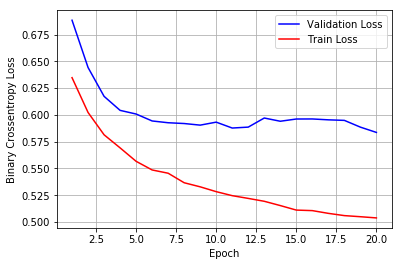

In [0]:
#This function is used to plot/update the train and test loss after each epoch.
import matplotlib.pyplot as plt
def plt_dynamic_loss(x, vy, ty, ax, colors=['b']):
    ax.plot(x, vy, 'b', label="Validation Loss")
    ax.plot(x, ty, 'r', label="Train Loss")
    plt.legend()
    plt.grid()
    fig.canvas.draw()

#Get model history
history=model.history

#Plot train vs test loss
fig,ax = plt.subplots(1,1)
ax.set_xlabel('Epoch') ; ax.set_ylabel('Binary Crossentropy Loss')

#List of epoch numbers
x = list(range(1,20+1))

#Display the loss
val_loss = history.history['val_loss'] #Validation Loss
loss = history.history['loss'] #Training Loss
plt_dynamic_loss(x, val_loss, loss, ax)

In [0]:
from keras.models import load_model
model.save("braintumor.h5")

In [0]:
import numpy as np
from keras.preprocessing import image
test_image = image.load_img('/content/Brain Tumor Dataset/Test/yes/Y249.JPG', target_size = (128, 128))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = model.predict(test_image)
training_set.class_indices
if result[0][0] == 1:
    prediction = 'Yes'
else:
    prediction = 'No'

In [0]:
result

array([[1.]], dtype=float32)

# Using Transfer Learning

In [4]:

#importing the library
import numpy as np
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dropout, Flatten, Dense, BatchNormalization
from keras import applications
from datetime import datetime as dt
from keras import regularizers as reg
from keras.optimizers import RMSprop
from keras.utils import to_categorical
import warnings
warnings.filterwarnings("ignore")
from keras.callbacks import ModelCheckpoint

Using TensorFlow backend.


In [26]:
global_start=dt.now()

#Dimensions of our flicker images is 256 X 256
img_width, img_height = 128, 128

#Declaration of parameters needed for training and validation
train_data_dir = '/content/Brain Tumor Dataset/Train'
validation_data_dir = '/content/Brain Tumor Dataset/Test'
epochs = 1000
batch_size = 1

#Get the bottleneck features by  Weights.T * Xi
def save_bottlebeck_features():
    datagen = ImageDataGenerator(rescale=1./255)

    #Load the pre trained VGG16 model from Keras, we will initialize only the convolution layers and ignore the top layers.
    model = applications.VGG16(include_top=False, weights='imagenet')

    generator_tr = datagen.flow_from_directory(train_data_dir,
                                            target_size=(img_width, img_height),
                                            batch_size=batch_size,
                                            class_mode=None, #class_mode=None means the generator won't load the class labels.
                                            shuffle=False) #We won't shuffle the data, because we want the class labels to stay in order.
    nb_train_samples = len(generator_tr.filenames) #3600. 1200 training samples for each class
    bottleneck_features_train = model.predict_generator(generator_tr, nb_train_samples // batch_size)
    np.save('bottleneck_features_train.npy',bottleneck_features_train) #bottleneck_features_train is a numpy array

    generator_ts = datagen.flow_from_directory(validation_data_dir,
                                            target_size=(img_width, img_height),
                                            batch_size=batch_size,
                                            class_mode=None,
                                            shuffle=False)
    nb_validation_samples = len(generator_ts.filenames) #1200. 400 training samples for each class
    bottleneck_features_validation = model.predict_generator(generator_ts, nb_validation_samples // batch_size)
    np.save('bottleneck_features_validation.npy',bottleneck_features_validation)
    print("Got the bottleneck features in time: ",dt.now()-global_start)
    
    num_classes = len(generator_tr.class_indices)
    
    return nb_train_samples,nb_validation_samples,num_classes,generator_tr,generator_ts
    
nb_train_samples,nb_validation_samples,num_classes,generator_tr,generator_ts=save_bottlebeck_features()

Found 233 images belonging to 2 classes.
Found 20 images belonging to 2 classes.
Got the bottleneck features in time:  0:00:02.878923


In [31]:
from keras import optimizers
num_classes=2
#After we get the bottleneck features, we will build the top fully connected layers on top of the bottlneck features. Let's build the top layers.
def train_top_model():
    global_start=dt.now()

    train_data = np.load('bottleneck_features_train.npy')
    validation_data = np.load('bottleneck_features_validation.npy')
    
    train_labels=generator_tr.classes  
    validation_labels=generator_ts.classes


    model = Sequential()
    model.add(Flatten(input_shape=train_data.shape[1:])) #Ignore the first index. It contains ID

    model.add(Dense(128, activation='relu',kernel_initializer='he_normal')) #Best weight initializer for relu is he_normal
    model.add(Dropout(rate=0.5))

    model.add(Dense(1, activation='sigmoid',kernel_initializer='he_normal')) #Because we have 3 classes. Remember, softmax is to multi-class, what sigmoid (log reg) is to binary

    optim=optimizers.Adam(lr=1e-6, decay=1e-7, beta_1=0.99, beta_2=0.99)
    model.compile(loss='binary_crossentropy',optimizer=optim,metrics=['accuracy'])
    model.summary()
    
    #Save the weights for the best epoch accuracy
    checkpointer = ModelCheckpoint(filepath="bottleneck_features_weights.hdf5", monitor = 'val_acc',verbose=1, save_best_only=True)
                                   
    model.fit(x=train_data,
              y=train_labels,
              epochs=epochs,
              validation_data=(validation_data, validation_labels),
              callbacks=[checkpointer])    
    
    #Refit our model with the best weights saved before
    model.load_weights('bottleneck_features_weights.hdf5')
    model.save('bottleneck_feature.h5')
    print("The top layer trained in time: ",dt.now()-global_start)
    
    return model

model=train_top_model()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_11 (Flatten)         (None, 8192)              0         
_________________________________________________________________
dense_21 (Dense)             (None, 128)               1048704   
_________________________________________________________________
dropout_11 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_22 (Dense)             (None, 1)                 129       
Total params: 1,048,833
Trainable params: 1,048,833
Non-trainable params: 0
_________________________________________________________________
Train on 233 samples, validate on 20 samples
Epoch 1/1000
233/233 [==============================] - 1s 5ms/step - loss: 0.7542 - acc: 0.5451 - val_loss: 0.7197 - val_acc: 0.4500

Epoch 00001: val_acc improved from -inf to 0.45000, saving model to bottleneck_featu

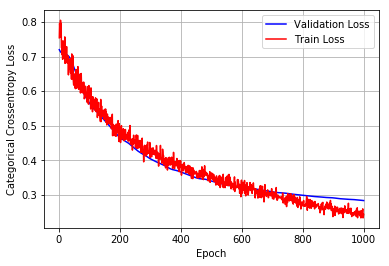

In [32]:
import matplotlib.pyplot as plt
def plt_dynamic_loss(x, vy, ty, ax, colors=['b']):
    ax.plot(x, vy, 'b', label="Validation Loss")
    ax.plot(x, ty, 'r', label="Train Loss")
    plt.legend()
    plt.grid()
    fig.canvas.draw()

#Get model history
history=model.history

#Plot train vs test loss
fig,ax = plt.subplots(1,1)
ax.set_xlabel('Epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

#List of epoch numbers
x = list(range(1,epochs+1))

#Display the loss
val_loss = history.history['val_loss'] #Validation Loss
loss = history.history['loss'] #Training Loss
plt_dynamic_loss(x, val_loss, loss, ax)